In [ ]:
!pip3 install pyECLAT

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=50ab0667f7aecb4685e4a23e781ae193e333a10079cb9f6dfdf3a0d142a43401
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/DataMining/'

In [ ]:
import numpy              as np
import pandas             as pd
import warnings

from pyECLAT import ECLAT
import time

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

from mlxtend.frequent_patterns import apriori
warnings.filterwarnings('ignore')

In [ ]:
#đọc file
txt_file = open(folder + '/Market Basket Analysis 2.txt', 'r')
# txt_file = open('/content/Market Basket Analysis 2.txt', 'r')

file_content = txt_file.read()

file_content
txt_file.close()

In [ ]:
lines = [line.rstrip(',') for line in file_content.split('\n')]
data = [line.split(',') for line in lines]

# Tạo dataframe
df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,None,None,None,None,None
1,Ghee,Coffee Powder,None,None,None,None,None,None,None,None,None
2,Lassi,Tea Powder,Butter,Cheese,None,None,None,None,None,None,None
3,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,None,None,None,None,None
4,Cheese,Yougurt,Coffee Powder,Sugar,Butter,Sweet,None,None,None,None,None


In [ ]:
transactions = []
for line in lines:
  transaction = line.strip().split(',')
  transaction = [item for item in transaction if item != '']
  transactions.append(transaction)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transaction = pd.DataFrame(te_ary, columns=te.columns_)
df_transaction

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
12522,True,False,True,True,False,False,False,False,True,False,False,False
12523,True,False,True,False,False,False,True,False,False,False,False,True
12524,True,False,True,False,True,False,False,False,True,False,False,True
12525,True,False,False,False,False,False,False,True,False,False,False,True


# ECLAT

In [ ]:
#Thời gian chạy Eclat
eclat_instance=ECLAT(data=df)
eclat_instance.max_items = 3
eclat_instance.parallel = False
start_time = time.time()

get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit_all(min_support=0.01,
                                                           separator=' & ',
                                                           verbose=True)
end_time = time.time()
eclat_time = end_time - start_time
print("Eclat_time:", eclat_time, "seconds")

Combination 1 by 1


12it [00:00, 128.23it/s]


Combination 2 by 2


66it [00:00, 115.98it/s]


Combination 3 by 3


220it [00:01, 110.13it/s]


Combination 4 by 4


495it [00:04, 102.52it/s]


Combination 5 by 5


792it [00:09, 83.31it/s]


Combination 6 by 6


924it [00:07, 122.20it/s]


Combination 7 by 7


792it [00:06, 127.67it/s]

Stopping in combination 7 by 7. All supports = 0.
Eclat_time: 30.831343173980713 seconds


In [ ]:
itemset=[]
for x in get_ECLAT_supports.keys():
  l= x.split(' & ')
  itemset.append(frozenset(l))
dic={'support':list(get_ECLAT_supports.values()),'itemsets':itemset}
dfeclat=pd.DataFrame(dic)
dfeclat.sort_values(by = 'support',ascending = False)

,support,itemsets
7,0.441127,(Milk)
2,0.439850,(Ghee)
1,0.439770,(Coffee Powder)
0,0.439291,(Yougurt)
11,0.437774,(Bread)
...,...,...
1630,0.010058,"(Yougurt, Coffee Powder, Lassi, Sugar, Tea Pow..."
1590,0.010058,"(Yougurt, Coffee Powder, Ghee, Lassi, Butter, ..."
1715,0.010058,"(Coffee Powder, Ghee, Lassi, Sugar, Butter, Sw..."
1693,0.010058,"(Yougurt, Ghee, Cheese, Milk, Sweet, Panner)"


In [ ]:
## eclat
rules_eclat = association_rules(dfeclat, min_threshold=0.5)
rules_eclat[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,"(Sweet, Panner)",(Lassi),0.100982,0.504990,1.164582
1,"(Lassi, Panner)",(Sweet),0.100982,0.506608,1.157446
2,"(Sweet, Sugar)",(Butter),0.099705,0.500601,1.144140
3,"(Lassi, Yougurt, Ghee)",(Coffee Powder),0.046699,0.501715,1.140858
4,"(Butter, Yougurt, Ghee)",(Coffee Powder),0.047737,0.500418,1.137909
...,...,...,...,...,...
631,"(Lassi, Tea Powder, Cheese, Sweet, Bread)",(Panner),0.010138,0.512097,1.178368
632,"(Lassi, Tea Powder, Cheese, Panner, Bread)",(Sweet),0.010138,0.500000,1.142349
633,"(Lassi, Tea Powder, Milk, Sweet, Bread)",(Panner),0.011096,0.511029,1.175912
634,"(Lassi, Tea Powder, Milk, Panner, Bread)",(Sweet),0.011096,0.512915,1.171856


In [ ]:
df_eclat_rules = rules_eclat[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
top_5_rules_eclat_multi = df_eclat_rules.sort_values(by=['support', 'confidence', 'lift'], ascending=[False, False, False]).head(5)

# In ra 5 quy tắc có giá trị "lift," "confidence," và "support" cao nhất
top_5_rules_eclat_multi


,antecedents,consequents,support,confidence,lift
1,"(Lassi, Panner)",(Sweet),0.100982,0.506608,1.157446
0,"(Sweet, Panner)",(Lassi),0.100982,0.504990,1.164582
2,"(Sweet, Sugar)",(Butter),0.099705,0.500601,1.144140
80,"(Sweet, Tea Powder, Panner)",(Lassi),0.049812,0.534247,1.232052
81,"(Tea Powder, Lassi, Panner)",(Sweet),0.049812,0.532423,1.216426


# Fp growth

In [ ]:
start_time = time.time()

fp_itemsets = fpgrowth(df_transaction, use_colnames=True, min_support=0.01)

end_time = time.time()
fpgrowth_time = end_time - start_time

print(f"Thời gian thực hiện: {fpgrowth_time:.4f} giây")
fp_itemsets

Thời gian thực hiện: 0.4533 giây


,support,itemsets
0,0.439850,(Ghee)
1,0.439770,(Coffee Powder)
2,0.439291,(Yougurt)
3,0.437535,(Butter)
4,0.437136,(Cheese)
...,...,...
1830,0.044065,"(Yougurt, Sugar, Bread, Ghee)"
1831,0.044943,"(Yougurt, Sugar, Bread, Milk)"
1832,0.021953,"(Coffee Powder, Sugar, Milk, Bread, Yougurt)"
1833,0.021474,"(Ghee, Coffee Powder, Sugar, Bread, Yougurt)"


In [ ]:
#fp growth
rules_fp = association_rules(fp_itemsets, min_threshold=0.5)
rules_fp[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,"(Yougurt, Ghee, Milk)",(Coffee Powder),0.047657,0.513328,1.167264
1,"(Sugar, Yougurt, Sweet)",(Butter),0.048056,0.508017,1.161089
2,"(Yougurt, Butter, Ghee)",(Coffee Powder),0.047737,0.500418,1.137909
3,"(Sugar, Yougurt, Coffee Powder)",(Butter),0.048535,0.503728,1.151287
4,"(Yougurt, Butter, Coffee Powder)",(Sugar),0.048535,0.500000,1.142557
...,...,...,...,...,...
631,"(Cheese, Yougurt, Sweet, Milk)",(Panner),0.022112,0.504554,1.161011
632,"(Panner, Yougurt, Sweet, Milk)",(Cheese),0.022112,0.509191,1.164835
633,"(Cheese, Sweet, Milk, Bread, Yougurt)",(Panner),0.010777,0.511364,1.176681
634,"(Panner, Sweet, Milk, Bread, Yougurt)",(Cheese),0.010777,0.501859,1.148061


In [ ]:
rules_fp[['antecedents','consequents','support','confidence','lift']].sort_values(by=['support', 'confidence', 'lift'],ascending=[False, False, False]).head(5)

,antecedents,consequents,support,confidence,lift
217,"(Panner, Lassi)",(Sweet),0.100982,0.506608,1.157446
218,"(Panner, Sweet)",(Lassi),0.100982,0.504990,1.164582
18,"(Sugar, Sweet)",(Butter),0.099705,0.500601,1.144140
484,"(Panner, Sweet, Tea Powder)",(Lassi),0.049812,0.534247,1.232052
483,"(Panner, Lassi, Tea Powder)",(Sweet),0.049812,0.532423,1.216426


# Apriori

In [ ]:
from apyori import apriori

In [ ]:
start_time = time.time()
association_rule = apriori(transactions, min_support=0.01, min_confidence=0.5, min_lift = 1)
association_results = list(association_rule)

end_time = time.time()

apriori_time = end_time - start_time
print("apriori_time:", apriori_time, "seconds")
print("Có {} tập luật.".format(len(association_results)))

apriori_time: 44.89270091056824 seconds
Có 380 tập luật.


In [ ]:
#tập phổ biến
list_apriori = []
for rule in association_results:
    support = rule.support
    itemsets = rule.items
    list_apriori.append([support,itemsets])
df_apriori = pd.DataFrame(list_apriori, columns=['support','itemsets'])
df_apriori

,support,itemsets
0,0.099705,"(Sweet, Butter, Sugar)"
1,0.100982,"(Sweet, Lassi, Panner)"
2,0.045182,"(Butter, Tea Powder, Yougurt, Bread)"
3,0.046779,"(Cheese, Coffee Powder, Bread, Panner)"
4,0.046779,"(Cheese, Milk, Bread, Panner)"
...,...,...
375,0.010697,"(Ghee, Lassi, Sugar, Tea Powder, Milk, Panner)"
376,0.010936,"(Ghee, Lassi, Tea Powder, Milk, Sweet, Panner)"
377,0.010218,"(Yougurt, Ghee, Lassi, Sugar, Tea Powder, Milk)"
378,0.011336,"(Lassi, Sugar, Tea Powder, Milk, Sweet, Panner)"


In [ ]:
# apriori
rules_data = []

for rule in association_results:
  support = rule.support
  for oder in rule.ordered_statistics:
    antecedent = oder.items_base
    consequent = oder.items_add
    confidence = oder.confidence
    lift = oder.lift

    rules_data.append({
        'Antecedent': antecedent,
        'Consequent': consequent,
        'Support': support,
        'Confidence': confidence,
        'Lift': lift
    })
df_rules = pd.DataFrame(rules_data)
df_rules

,Antecedent,Consequent,Support,Confidence,Lift
0,"(Sweet, Sugar)",(Butter),0.099705,0.500601,1.144140
1,"(Lassi, Panner)",(Sweet),0.100982,0.506608,1.157446
2,"(Sweet, Panner)",(Lassi),0.100982,0.504990,1.164582
3,"(Butter, Tea Powder, Bread)",(Yougurt),0.045182,0.502664,1.144262
4,"(Cheese, Panner, Coffee Powder)",(Bread),0.046779,0.500427,1.143116
...,...,...,...,...,...
631,"(Yougurt, Ghee, Lassi, Tea Powder, Milk)",(Sugar),0.010218,0.501961,1.147038
632,"(Yougurt, Ghee, Lassi, Sugar, Tea Powder)",(Milk),0.010218,0.505929,1.146900
633,"(Lassi, Sugar, Tea Powder, Milk, Panner)",(Sweet),0.011336,0.518248,1.184041
634,"(Sugar, Tea Powder, Milk, Sweet, Panner)",(Lassi),0.011336,0.522059,1.203945


In [ ]:
top_rules_apriori = df_rules.sort_values(by=['Support', 'Lift', 'Confidence'], ascending=[False, False, False]).head(5)

# In ra 5 quy tắc có giá trị "lift," "confidence," và "support" cao nhất
top_rules_apriori


,Antecedent,Consequent,Support,Confidence,Lift
2,"(Sweet, Panner)",(Lassi),0.100982,0.504990,1.164582
1,"(Lassi, Panner)",(Sweet),0.100982,0.506608,1.157446
0,"(Sweet, Sugar)",(Butter),0.099705,0.500601,1.144140
90,"(Sweet, Tea Powder, Panner)",(Lassi),0.049812,0.534247,1.232052
88,"(Tea Powder, Lassi, Panner)",(Sweet),0.049812,0.532423,1.216426


# Thời gian chạy

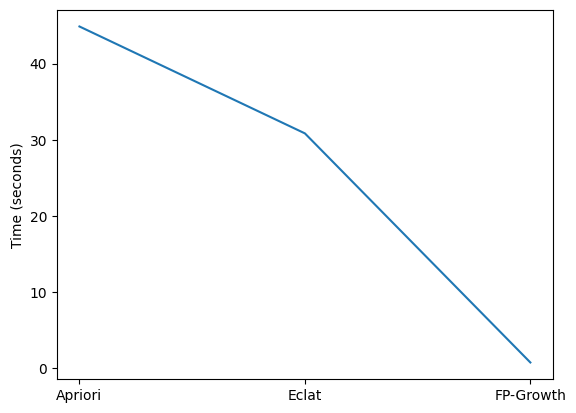

In [ ]:
import matplotlib.pyplot as plt
x = ['Apriori','Eclat','FP-Growth']
y = [apriori_time,eclat_time,fpgrowth_time]
plt.plot(x,y)
plt.ylabel("Time (seconds)")
plt.show()